# Notebook for Data Exploration and Connection to DB

## Load libraries

In [1]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append("../")
from src import puhti_files
from src.common_basis import *

Database password (connection attempt failed with (pymysql.err.OperationalError) (1045, "Access denied for user 'hpc-hd-ro'@'puhti-nat-1.csc.fi' (using password: NO)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)): ········


In [2]:
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [4]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /users/sebarodr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /users/sebarodr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
from gensim.models import Word2Vec

In [6]:
SEED = 42
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

## Dev Data

In [7]:
df = puhti_files.genre_data_to_pandas(data="dev")

Read in dataset dev.csv. Set param 'data' to 'dev', 'test' or 'train' if you want another dataset.


In [8]:
df['text'] = df['document_id'].apply(lambda x: puhti_files.read_text_file(x))

In [9]:
df['text']

0       BIOGRAPHICAL SKETCHES\n\nOF SOME OF THF\nLEADI...
1       i/\n\n//\n\n-I,\nI,\n\n/· / t\n\nJiY\n\n1;-f\n...
2       A SO·3 RM~l\n\nOF~\n\nPRAY'nER and TH~gANPKSG ...
3       ··Y· ·····\n\n· _ ·1\n\n__·\n\nri_·_ i\n\n"· ·...
4       ,-* U* A.U S..,\nZ.T -ES-AU'/iS\n\nLingux Lati...
                              ...                        
3007    brol\n\ntr\n\n71Z~~''\n: 'E- 1 1\n\n~~~~~~~~ '...
3008    THE\nW AY\n\nTO\nK E E P HIM.\n\nA\nC -O'M E D...
3009    VOLUME V.\n\nOF THE\nAUTHOR'S WORKS.\n\nCONTAI...
3010    A D V I C E\nADVICE\n\nTO THE\nPEOPLE in GENER...
3011    / /\nT H F-\nTHE\nMAID OF BATH,\n\nA\nCO M E D...
Name: text, Length: 3012, dtype: object

In [10]:
df['text'] = df['text'].str.lower()

In [11]:
df['text'] = df["text"].str.replace('\s+', ' ', regex=True)

In [12]:
df['text'] = df['text'].str.replace(r'[^A-Za-z0-9]+', ' ', regex=True)

In [13]:
df['text'] = df["text"].str.replace('\s+', ' ', regex=True)

In [14]:
df['text'] = df['text'].str.replace('\d+', '',regex=True)

## Metadata

In [15]:
metadata = puhti_files.ecco_metadata_to_pandas()

In [16]:
metadata

,document_id_octavo,publication_year,gatherings,total_price,publication_place,author_id,other_actors
0,0000100100,1723,12mo,NaN,London,98354271,bbti_77907; bbti_72802; 51557323
1,0000100200,1733,8vo,NaN,London,76461649,66340504; bbti_51500; 68786630
2,0000100300,1765,12mo,NaN,London,46318688,bbti_112410; bbti_26196
3,0000100400,1720,12mo,NaN,London,67409380,bbti_4638; bbti_70361
4,0000100501,1703,4to,NaN,London,61784573,20781965; bbti_70360
...,...,...,...,...,...,...,...
275222,1143993,1680,2fo,NaN,London,NaN,bbti_47378
275223,1143994,1678,8vo,NaN,London,66813373,bbti_44765; bbti_42013
275224,1143997,1685,2fo,NaN,Dublin,NaN,samuelhelsham_0; 147809350; andrewcrook_1; 235...
275225,1144469,1689,2fo,NaN,London,NaN,NaN


In [17]:
dict_labels = puhti_files.labels_to_dict()

In [19]:
ecco_core = pd.read_sql_table("ecco_core", con)

OperationalError: (pymysql.err.OperationalError) (1815, 'Internal error: MCS-2033: Error occurred when calling system catalog.')
[SQL: SELECT ecco_core.ecco_id, ecco_core.estc_id, ecco_core.ecco_part, ecco_core.ecco_module, ecco_core.ecco_full_title, ecco_core.estc_id_octavo, ecco_core.ecco_nr_characters, ecco_core.ecco_nr_tokens, ecco_core.ecco_date_start, ecco_core.ecco_date_end, ecco_core.ecco_pages, ecco_core.ecco_languge, ecco_core.ecco_nr_paragraphs 
FROM ecco_core]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
ecco_core.head()

In [ ]:
pd.merge(df, metadata, left_on='document_id', right_on='document_id_octavo')

In [ ]:
ecco_wdata = pd.merge(df, ecco_core, left_on='document_id', right_on='ecco_id')

In [ ]:
ecco_wdata['ecco_languge'].value_counts()

In [ ]:
ecco_wdata[ecco_wdata['ecco_languge'] == 'English'].head()

In [ ]:
ecco_document_parts = pd.read_sql_table("ecco_document_parts", con)

In [ ]:
ecco_document_parts.head()

In [ ]:
ecco_parts_data = pd.merge(df, ecco_document_parts, left_on='document_id', right_on='ecco_id')

In [ ]:
ecco_parts_data['document_part_type'].value_counts()

In [ ]:
ecco_parts_data[ecco_parts_data['document_part_type']=='body'].head()

## Preprocessing 

This preprocessing will be done only over the text in english, so we can apply the stopwords and don't confuse the model with multiple languages.

In [ ]:
#english_docs = ecco_wdata[ecco_wdata['ecco_languge'] == 'English']

In [20]:
english_docs=df

In [21]:
def clean_text(text,tokenizer,stopwords):
    tokens = tokenizer(text)
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    tokens = [t for t in tokens if not t in stopwords]
    #tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    return tokens

In [22]:
stop_words = stopwords.words("english")
english_docs["tokens"] =english_docs["text"].map(lambda x: clean_text(x, word_tokenize, stop_words))

In [23]:
english_docs.head()

,document_id,work_id,main_category,sub_category,text,tokens
0,1243400400,X-biographical sketches of some of the leading...,4,10,biographical sketches of some of thf leadin me...,"[biographical, sketches, thf, leadin, men, pre..."
1,1588400300,19754-rudiments and practical exercises for le...,1,3,i i i t jiy f s ra a iid oi c i yic f r...,"[jiy, ra, iid, oi, yic, ud, practical, exercis..."
2,1628902300,1-liturgies,9,29,a so rm l of pray ner and th ganpksg iv ingg ...,"[rm, pray, ner, th, ganpksg, iv, ingg, almight..."
3,1404100101,1519-new history of holy bible,4,9,y ri i u f h r r z p i i r tr j i j i ci l...,"[ri, tr, ci, fp, ji, chd, de, ci, sr, ht, rs, ..."
4,0964200401,1653-thesaurus linguae latinae compendiarius,1,3,u a u s z t es au is lingux latin e compendia...,"[es, au, lingux, latin, compendiarius, compend..."


In [24]:
_, idx = np.unique(english_docs["tokens"], return_index=True)
english_docs = english_docs.iloc[idx, :]

In [25]:
english_docs.head()

,document_id,work_id,main_category,sub_category,text,tokens
2216,0018700501,62-sentimental journey through france and italy,2,17,s aa ci czc tc o csl zc a t r hwa l jk mk...,"[aa, ci, czc, tc, csl, zc, hwa, jk, mka, zkiua..."
832,0561800800,1663-sir harry wildair being sequel of trip to...,0,0,aa ito i rn i i u sir harry wildair bei ng ...,"[aa, ito, rn, sir, harry, wildair, bei, ng, se..."
2909,0809000502,35-meditations and contemplations in two volumes,8,30,d aa t a sz rca meditations a n d contempla...,"[aa, sz, rca, meditations, contemplations, tv,..."
256,1088901200,1-liturgies,9,29,r aa y d and thanksgiving to al i mi g h ty g...,"[aa, thanksgiving, al, mi, ty, god, used, chur..."
547,1172000107,143-works of shakespear,6,25,k i aasl ini the works f mr jklliamn sh...,"[aasl, ini, works, mr, jklliamn, shakcfpear, v..."


In [26]:
#Clean in case there are no tokens 
english_docs = english_docs[english_docs['tokens'].map(lambda x: len(x) > 0)]


In [27]:
tokens = english_docs['tokens'].values

In [28]:
model = Word2Vec(sentences=tokens, vector_size=100, workers=4, seed=SEED)

In [29]:
model

In [30]:
model.wv.most_similar("london")

[('dublin', 0.8322654962539673),
 ('edinburgh', 0.7861098647117615),
 ('westminster', 0.7051481604576111),
 ('glasgow', 0.6880032420158386),
 ('bristol', 0.6809364557266235),
 ('chelsea', 0.6759371161460876),
 ('town', 0.6723046898841858),
 ('burgh', 0.6679133176803589),
 ('hospital', 0.6660974025726318),
 ('houfc', 0.6651731133460999)]

In [31]:
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")

In [32]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [33]:
vectorized_docs = vectorize(tokens, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(3012, 100)

In [34]:
vectorized_docs = np.array(vectorized_docs)

In [35]:
vectorized_docs.shape

(3012, 100)

## Clustering

In [36]:
!{sys.executable} -m pip install hdbscan
!{sys.executable} -m pip install umap
!{sys.executable} -m pip install umap-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82813 sha256=ee3aef2b6b2ffedabbac11d094cf0baf314dd2d6b4522a6ee159f58d8acefe04
  Stored in directory: /users/sebarodr/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55496 sha256=59de81bd2003c77d2f7fc337cd5fa889656985c8c8f944bb7e8c2fa3ddbb2b83
  Stored in directory: /users/sebarodr/.cache/pip/wheels/f8/5c/b4/a06301605095861524c

In [41]:
import hdbscan
import umap
import umap.plot
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
db = DBSCAN(eps=1.05, min_samples=10).fit(vectorized_docs)

In [ ]:
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

In [ ]:
labels,english_docs['main_category'].unique()

In [ ]:
metrics.confusion_matrix(english_docs['main_category'].values,labels)

In [ ]:
np.unique(labels)

In [47]:
def n_to_label(x):
    for genre, id_g in dict_labels['main2id'].items():
        if id_g == x:
            return genre

In [48]:
english_docs['labels_text_main'] = english_docs['main_category'].apply(lambda x:n_to_label(x))

In [56]:
seq2vec_embedding = umap.UMAP(n_components=2,metric='cosine').fit(vectorized_docs)

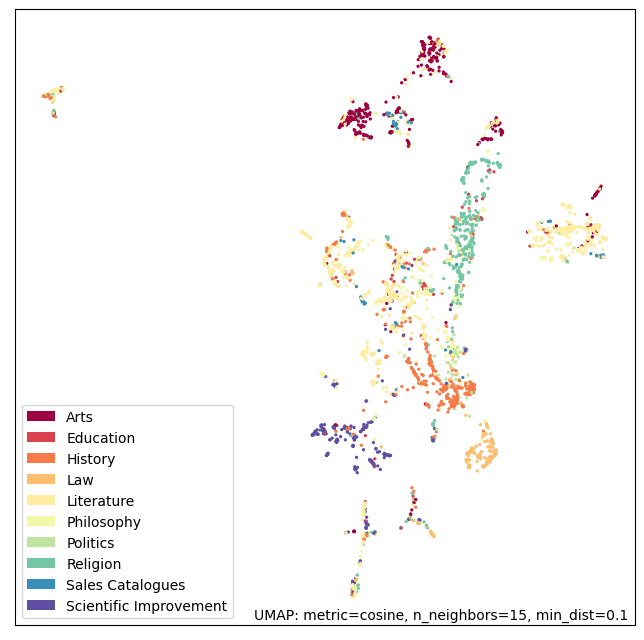

In [57]:
fig = umap.plot.points(seq2vec_embedding, labels=english_docs['labels_text_main'])

In [54]:
def cluster_umap(n_neighbors,n_components,random_state,embeddings,min_cluster_size):
    umap_embeddings = (umap.UMAP(n_neighbors=n_neighbors, 
                                n_components=n_components, 
                                metric='cosine', 
                                random_state=random_state)
                            .fit_transform(embeddings))

    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size,
                               metric='euclidean', 
                               cluster_selection_method='eom').fit(umap_embeddings)
    return clusters

In [59]:
clusters = cluster_umap(15,2,1234,vectorized_docs,15)

In [64]:
set(clusters.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40}